In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("GSU_Endustri_Muhendisligi_Ders_Oneri_Sistemi_Anketi_Train.csv", sep=";")

In [3]:
df = df.iloc[:,2:]

In [4]:
(rows, _) = df.shape
col_names = df.columns[np.where(np.count_nonzero(df, axis=0) < 0.2 * rows)[0]]
df.drop(columns=col_names, inplace=True)

In [5]:
def regularization_loss(x, lamda=1):
    return 0.5 * lamda * ((x**2).sum())

In [6]:
def gradient_descent(x, theta, r, y, lamda=1, alpha=0.001):
    x_copy = x.copy()
    theta_copy = theta.copy()

    (ni, nfeatures) = x.shape
    (nu, _) = theta.shape

    for i in range(0, ni):
        for k in range(0, nfeatures):
            tmp = 0
            for j in range(0, nu):
                if r.iloc[j, i]:
                    tmp += (np.dot(theta_copy[j, :], x_copy[i, :]) - y.iloc[j, i]) * theta_copy[j, k]
            x[i, k] -= alpha * (tmp + lamda * x[i, k])

    for j in range(0, nu):
        for k in range(0, nfeatures):
            tmp = 0
            for i in range(0, ni):
                if r.iloc[j, i]:
                    tmp += (np.dot(theta_copy[j, :], x_copy[i, :]) - y.iloc[j, i]) * x_copy[i, k]
            theta[j, k] -= alpha * (tmp + lamda * theta[j, k])

    return x, theta

In [50]:
def matrix_factorization(y, f):
    (nu, ni) = y.shape

    # Initialize user & item matrices
    theta = np.random.rand(nu, f) * 5
    x = np.random.rand(ni, f)

    # Learn non-zero i,j duo
    r = y > 0

    ploss = 1e15
    step = 1

    loss = []
    regularization = []

    while True:
        closs = 0
        for i in range(0, nu):
            for j in range(0, ni):
                if r.iloc[i, j]:
                    closs += 0.5 * ((np.dot(theta[i, :], x[j, :]) - y.iloc[i, j]) ** 2)
        regularization.append(regularization_loss(x) + regularization_loss(theta))
        closs += regularization[step-1]
        loss.append(closs)
        print("Step: {}, current loss: {}".format(step, closs.round(3)))

        if ploss - closs < 1e-2 or step >= 1e3:
            return theta, x, loss, regularization

        step += 1
        ploss = closs
        x, theta = gradient_descent(x, theta, r, y)

In [51]:
theta, x, loss, regularization_loss_1 = matrix_factorization(df, f=2)

Step: 1, current loss: 3115.72
Step: 2, current loss: 2320.609
Step: 3, current loss: 2014.014
Step: 4, current loss: 1868.559
Step: 5, current loss: 1781.771
Step: 6, current loss: 1719.289
Step: 7, current loss: 1668.637
Step: 8, current loss: 1624.8
Step: 9, current loss: 1585.511
Step: 10, current loss: 1549.612
Step: 11, current loss: 1516.441
Step: 12, current loss: 1485.579
Step: 13, current loss: 1456.738
Step: 14, current loss: 1429.706
Step: 15, current loss: 1404.316
Step: 16, current loss: 1380.432
Step: 17, current loss: 1357.939
Step: 18, current loss: 1336.735
Step: 19, current loss: 1316.734
Step: 20, current loss: 1297.854
Step: 21, current loss: 1280.024
Step: 22, current loss: 1263.177
Step: 23, current loss: 1247.252
Step: 24, current loss: 1232.193
Step: 25, current loss: 1217.948
Step: 26, current loss: 1204.469
Step: 27, current loss: 1191.71
Step: 28, current loss: 1179.628
Step: 29, current loss: 1168.186
Step: 30, current loss: 1157.344
Step: 31, current loss:

In [52]:
result = pd.DataFrame(np.matmul(theta, x.transpose()), columns=df.columns).round(3)
result.to_csv('result.csv', sep=',')

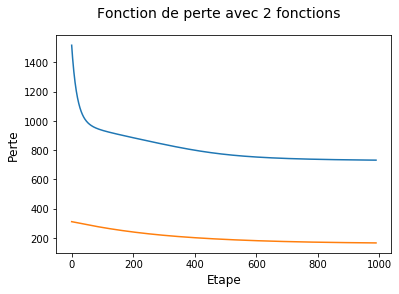

In [53]:
fig = plt.figure()
plt.plot(loss[10:])
plt.plot(regularization_loss_1[10:])
fig.suptitle("Fonction de perte avec 2 fonctions", fontsize=14)
plt.xlabel('Etape', fontsize=12)
plt.ylabel('Perte', fontsize=12)
fig.savefig('result.png')
plt.show()

In [54]:
theta_2, x_2, loss_2, regularization_loss_2 = matrix_factorization(df, f=4)

Step: 1, current loss: 6422.376
Step: 2, current loss: 2346.31
Step: 3, current loss: 2057.929
Step: 4, current loss: 1943.852
Step: 5, current loss: 1872.619
Step: 6, current loss: 1819.25
Step: 7, current loss: 1775.721
Step: 8, current loss: 1738.541
Step: 9, current loss: 1705.888
Step: 10, current loss: 1676.694
Step: 11, current loss: 1650.271
Step: 12, current loss: 1626.14
Step: 13, current loss: 1603.949
Step: 14, current loss: 1583.428
Step: 15, current loss: 1564.359
Step: 16, current loss: 1546.567
Step: 17, current loss: 1529.906
Step: 18, current loss: 1514.251
Step: 19, current loss: 1499.497
Step: 20, current loss: 1485.555
Step: 21, current loss: 1472.346
Step: 22, current loss: 1459.802
Step: 23, current loss: 1447.865
Step: 24, current loss: 1436.483
Step: 25, current loss: 1425.609
Step: 26, current loss: 1415.205
Step: 27, current loss: 1405.233
Step: 28, current loss: 1395.663
Step: 29, current loss: 1386.466
Step: 30, current loss: 1377.616
Step: 31, current loss

In [55]:
result_2 = pd.DataFrame(np.matmul(theta_2, x_2.transpose()), columns=df.columns).round(3)
result_2.to_csv('result2.csv', sep=',')

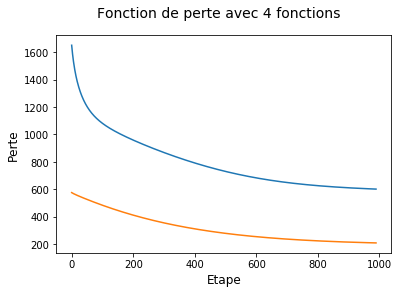

In [56]:
fig = plt.figure()
plt.plot(loss_2[10:])
plt.plot(regularization_loss_2[10:])
fig.suptitle("Fonction de perte avec 4 fonctions", fontsize=14)
plt.xlabel('Etape', fontsize=12)
plt.ylabel('Perte', fontsize=12)
fig.savefig('result2.png')

In [57]:
theta_3, x_3, loss_3, regularization_loss_3 = matrix_factorization(df, f=8)

Step: 1, current loss: 33305.95
Step: 2, current loss: 7605.565
Step: 3, current loss: 3318.173
Step: 4, current loss: 2599.1
Step: 5, current loss: 2397.504
Step: 6, current loss: 2298.33
Step: 7, current loss: 2226.25
Step: 8, current loss: 2165.98
Step: 9, current loss: 2113.385
Step: 10, current loss: 2066.786
Step: 11, current loss: 2025.184
Step: 12, current loss: 1987.835
Step: 13, current loss: 1954.144
Step: 14, current loss: 1923.618
Step: 15, current loss: 1895.842
Step: 16, current loss: 1870.464
Step: 17, current loss: 1847.184
Step: 18, current loss: 1825.749
Step: 19, current loss: 1805.939
Step: 20, current loss: 1787.565
Step: 21, current loss: 1770.465
Step: 22, current loss: 1754.499
Step: 23, current loss: 1739.543
Step: 24, current loss: 1725.493
Step: 25, current loss: 1712.255
Step: 26, current loss: 1699.747
Step: 27, current loss: 1687.899
Step: 28, current loss: 1676.648
Step: 29, current loss: 1665.938
Step: 30, current loss: 1655.72
Step: 31, current loss: 1

In [58]:
result_3 = pd.DataFrame(np.matmul(theta_3, x_3.transpose()), columns=df.columns).round(3)
result_3.to_csv('result3.csv', sep=',')

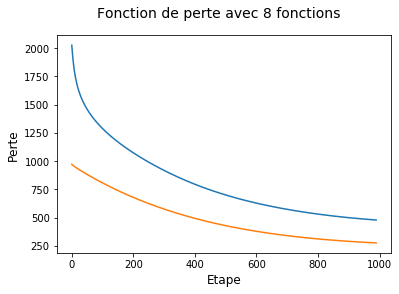

In [59]:
fig = plt.figure()
plt.plot(loss_3[10:])
plt.plot(regularization_loss_3[10:])
fig.suptitle("Fonction de perte avec 8 fonctions", fontsize=14)
plt.xlabel('Etape', fontsize=12)
plt.ylabel('Perte', fontsize=12)
fig.savefig('result3.png')

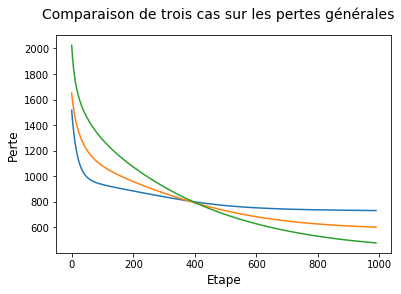

In [60]:
fig = plt.figure()
plt.plot(loss[10:])
plt.plot(loss_2[10:])
plt.plot(loss_3[10:])
fig.suptitle("Comparaison de trois cas sur les pertes générales", fontsize=14)
plt.xlabel('Etape', fontsize=12)
plt.ylabel('Perte', fontsize=12)
fig.savefig('comparaison.png')

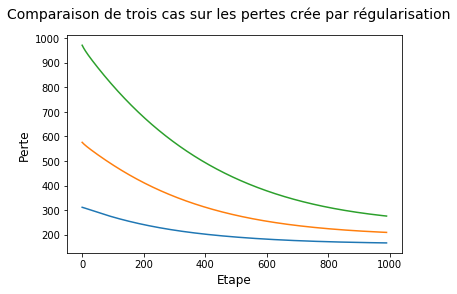

In [61]:
fig = plt.figure()
plt.plot(regularization_loss_1[10:])
plt.plot(regularization_loss_2[10:])
plt.plot(regularization_loss_3[10:])
fig.suptitle("Comparaison de trois cas sur les pertes crée par régularisation", fontsize=14)
plt.xlabel('Etape', fontsize=12)
plt.ylabel('Perte', fontsize=12)
fig.savefig('comparaison2.png')

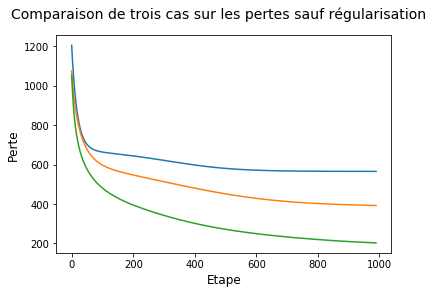

In [62]:
fig = plt.figure()
plt.plot(list(np.array(loss[10:]) - np.array(regularization_loss_1[10:])))
plt.plot(list(np.array(loss_2[10:]) - np.array(regularization_loss_2[10:])))
plt.plot(list(np.array(loss_3[10:]) - np.array(regularization_loss_3[10:])))
fig.suptitle("Comparaison de trois cas sur les pertes sauf régularisation", fontsize=14)
plt.xlabel('Etape', fontsize=12)
plt.ylabel('Perte', fontsize=12)
fig.savefig('comparaison3.png')

In [63]:
(regularization_loss_1[1], regularization_loss_1[-1], regularization_loss_2[1], regularization_loss_2[-1],regularization_loss_3[1], regularization_loss_3[-1])

(311.3274945895348,
 166.64587963662336,
 599.1222389906301,
 209.4856457295756,
 1012.328038219309,
 276.01574818012824)

In [64]:
df_test = pd.read_csv("GSU_Endustri_Muhendisligi_Ders_Oneri_Sistemi_Anketi_Test.csv", sep=";")

In [65]:
df_test.shape

(32, 63)

In [66]:
df_test.head()

,Zaman damgası,Ad - Soyad,Matematik I - II,Fizik I - II,Kimya I - II,Bilgisayar I - II,Endüstri Mühendisliğine Giriş,Yüksek Matematik I - II,Lineer Cebir,Elektrik ve Elektronik,...,İş Hukuku,Sistem Dinamiği,Investment Analysis,Enterprıse Resources Planing,Inventory Management,Enerji politikaları ve Planlaması,Toplam Kalite Yönetimi,Şirket Yönetimi Ve Girişimcilik,Risk Analizi ve Yönetimi,Rekabet ve Pazarlama Yönetimi
0,2019/11/26 1:36:33 ÖS GMT+3,Mülayim abdülrezzak bozdoğan,1,1,1,1,5,1,1,0,...,1,3,0,0,0,1,0,1,0,0
1,2019/11/26 1:36:36 ÖS GMT+3,Kadir Kahraman,4,2,2,3,4,2,2,3,...,4,5,0,0,0,0,4,3,5,0
2,2019/11/26 1:37:07 ÖS GMT+3,Nevin Erdeniz,4,4,3,2,1,4,4,3,...,3,0,0,0,5,4,0,1,0,0
3,2019/11/26 1:41:05 ÖS GMT+3,Selin öner,2,2,1,2,3,2,1,1,...,3,0,0,0,0,2,5,1,0,0
4,2019/11/26 1:49:24 ÖS GMT+3,Fatih Tanrıver,4,4,3,1,1,5,5,2,...,4,0,0,5,0,4,0,4,0,0


In [67]:
df_test = df_test.iloc[:,2:]
df_test.drop(columns=col_names, inplace=True)

In [68]:
df_test.shape

(32, 54)

In [69]:
df_test.columns

Index(['Matematik I - II', 'Fizik I - II', 'Kimya I - II', 'Bilgisayar I - II',
       'Endüstri Mühendisliğine Giriş', 'Yüksek Matematik I - II',
       'Lineer Cebir', 'Elektrik ve Elektronik', 'Termodinamik', 'Mekanik',
       'Algoritma ve İleri Bilg. Programlama', 'İş Güvenliği ve Sağlığı',
       'Genel Muhasebe', 'Diferansiyel Denklemler',
       'Bilişim Teknolojilerine Giriş', 'Olasılık',
       'Üretim Yöntemleri ve Malzeme Bilimi', 'Maliyet Muhasebesi',
       'İktisada Giriş', 'İstatistik', 'Bilgisayar Destekli İmalat Sistemleri',
       'Yöneylem Araştırması I', 'Sistem Analizi',
       'Endüstriyel Ekoloji ve Sürdürülebilir Mühendislik',
       'Yeni Ürün ve İş Geliştirme', 'Verimlilik Yönetimi', 'Mikro Ekonomi',
       'Mühendislik Etiği', 'Modelleme ve Simülasyon', 'Mühendislik Ekonomisi',
       'Üretim ve Planlama', 'Yöneylem Araştırması II', 'Ergonomi',
       'Hizmet Sistemleri', 'Proje Yönetimine Giriş',
       'Uygulamalarla Matematiksel Modelleme', 'Oyun Teorisin

In [71]:
test = df_test.iloc[-6:,37:44]

In [83]:
test

,Kalite Mühendisliği,Üretim Yönetimi,Yönetim Bilişim Sistemleri ve İş Analitiği,Decision Analysis,Tedarik Zinciri Yönetimi,Yönetim ve Organizasyon,İnsan Kaynakları Yönetimi
26,5,5,4,0,5,0,0
27,4,5,4,0,5,0,5
28,3,4,2,0,3,3,0
29,3,5,3,4,0,2,0
30,4,5,3,0,4,4,3
31,5,3,1,0,1,0,1


In [72]:
result_test = result.iloc[-6:,37:44]
result_test_2 = result_2.iloc[-6:,37:44]
result_test_3 = result_3.iloc[-6:,37:44]

In [73]:
result_test

,Kalite Mühendisliği,Üretim Yönetimi,Yönetim Bilişim Sistemleri ve İş Analitiği,Decision Analysis,Tedarik Zinciri Yönetimi,Yönetim ve Organizasyon,İnsan Kaynakları Yönetimi
26,4.782,5.277,3.758,4.892,4.549,4.220,4.893
27,4.407,4.833,3.452,4.459,4.185,3.834,4.562
28,2.337,3.237,2.099,3.468,2.374,3.262,1.249
29,2.910,3.761,2.506,3.877,2.894,3.570,2.023
30,3.752,4.369,3.040,4.212,3.622,3.727,3.443
31,2.759,3.815,2.475,4.083,2.802,3.839,1.486


In [81]:
result_test_2

,Kalite Mühendisliği,Üretim Yönetimi,Yönetim Bilişim Sistemleri ve İş Analitiği,Decision Analysis,Tedarik Zinciri Yönetimi,Yönetim ve Organizasyon,İnsan Kaynakları Yönetimi
26,5.118,5.179,3.354,4.837,4.806,4.399,5.488
27,4.333,4.900,3.193,4.985,4.855,3.928,4.774
28,2.630,3.123,1.949,3.506,2.457,3.584,1.452
29,2.792,4.252,2.700,5.389,4.626,3.665,2.565
30,3.819,4.408,2.879,4.521,4.044,3.825,3.724
31,3.073,3.665,2.454,3.642,2.448,3.763,1.914


In [82]:
result_test_3

,Kalite Mühendisliği,Üretim Yönetimi,Yönetim Bilişim Sistemleri ve İş Analitiği,Decision Analysis,Tedarik Zinciri Yönetimi,Yönetim ve Organizasyon,İnsan Kaynakları Yönetimi
26,4.709,5.179,3.949,5.254,5.103,4.227,4.440
27,4.230,4.816,3.651,4.533,4.597,3.599,4.625
28,1.595,3.165,2.923,2.382,2.966,2.944,1.353
29,2.098,4.423,3.284,4.728,4.974,3.065,3.408
30,3.142,4.922,3.218,5.045,4.613,2.834,2.452
31,4.540,2.910,1.440,4.784,1.149,6.652,1.663


In [76]:
def calculate_loss_over_test(t, tchapeau):
    (rows,cols) = t.shape
    loss = 0
    for i in range(0,rows):
        for j in range(0,cols):
            if t.iloc[i,j] != 0:
                loss += (t.iloc[i,j] - tchapeau.iloc[i,j])**2
    return loss

In [77]:
loss_test_1 = calculate_loss_over_test(test, result_test)
loss_test_2 = calculate_loss_over_test(test, result_test_2)
loss_test_3 = calculate_loss_over_test(test, result_test_3)

In [78]:
loss_test_1

19.715732

In [79]:
loss_test_2

18.440378000000003

In [80]:
loss_test_3

10.760863000000004